# Practice on logistic regression and classification assessment

Data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

**Loading the data set from Scikit-Learn**

In [2]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [3]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [4]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [5]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [7]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [8]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


We check at first if the tumor radius is a good predictor for breast cancer.

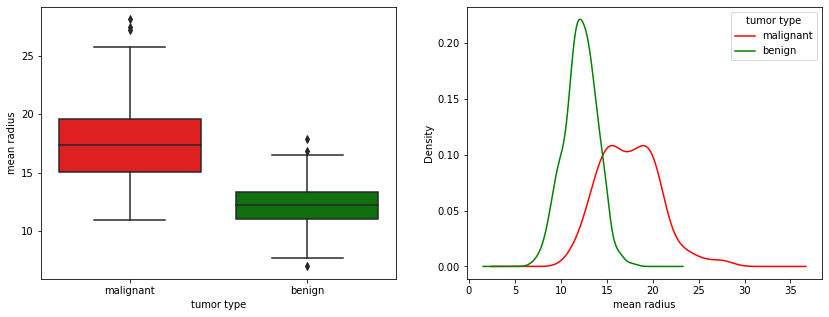

In [10]:
feature_name = 'mean radius'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plot boxplot on first figure
import seaborn as sns
sns.boxplot(x=target['tumor type'], y=feature_name, data=features, ax=axes[0], palette=['red', 'green'])

# Plot densities on second figure
for i, feature_value in enumerate(['malignant', 'benign']):
    (features[feature_name][target['tumor type']==feature_value]).plot(kind='density', c=['red', 'green'][i], label=feature_value, ax=axes[1])
axes[1].legend(title=target.columns.values[0])
axes[1].set_xlabel(feature_name)

plt.show()

The distribution of mean radius is clearly different for malignant and benign tumors so it seems that mean radius can be a good predictor.

* Encode the target and plot it with respect to mean radius.

In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target.values.reshape(-1,))

In [12]:
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


In [13]:
pd.DataFrame(y).sample(n=8, random_state=1)

,0
421,0
47,1
292,0
186,1
414,1
132,1
161,1
197,1


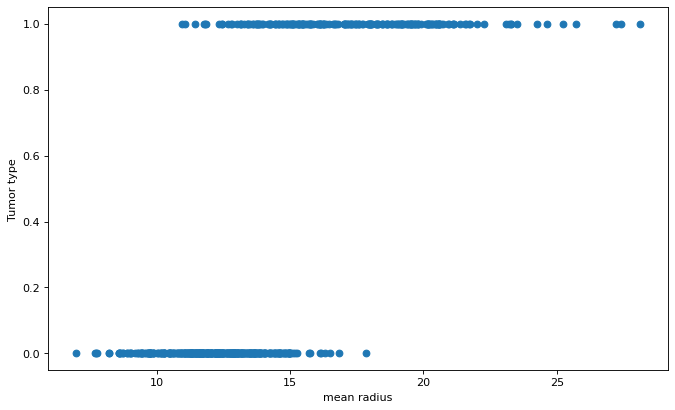

In [14]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(features[feature_name], y)
plt.xlabel(feature_name)
plt.ylabel("Tumor type")
plt.show()

* Do a train-test split and train a logistic regression.

**Train-test split:**

In [15]:
X = features['mean radius'].values.reshape(-1,1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

**Feature scaling:**

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Training the logistic regression model**

In [18]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

* Add the curve of the probability $P\left( Y=1 \left| X=x \right. \right)$. Here $Y$ is the tumor type and $x$ is the mean radius.

In [19]:
# We define a set of x values
X_set = np.arange(0, 30, 0.1)
X_set = X_set.reshape(-1,1)
y_proba = log_reg.predict_proba(sc.transform(X_set))
y_score = y_proba[:,1]

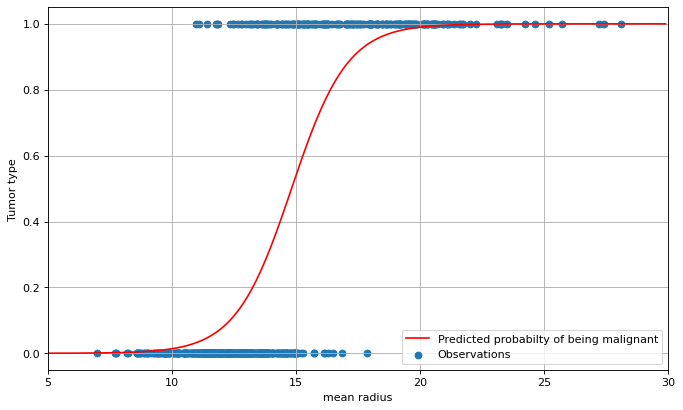

In [20]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(features[feature_name], y, label='Observations')
plt.plot(X_set, y_score, c='red', label='Predicted probabilty of being malignant')
plt.xlim([5, 30])
plt.xlabel(feature_name)
plt.ylabel("Tumor type")
plt.legend()
plt.grid()
plt.show()

On the graph above, we can see that the probability curve starts to be above 0.5 (i.e. prediction of malignant) for a value of mean radius between 14 and 15.

In [21]:
print(label_encoder.inverse_transform(log_reg.predict(sc.transform([[14]]))))

['benign']


In [22]:
print(label_encoder.inverse_transform(log_reg.predict(sc.transform([[15]]))))

['malignant']


* Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix
y_proba = log_reg.predict_proba(X_test)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  6]
 [ 8 45]]


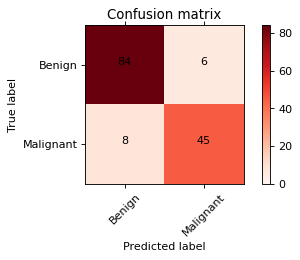

In [24]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Benign','Malignant']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[0, 1]  + cm[1, 1])
recall = cm[1, 1] / (cm[1, 0]  + cm[1, 1])

In [26]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy,2)))
print('Precision (proportion of true malignant among tumor type prediction) is ' + str(round(precision,2)))
print('Recall (proportion of true malignant that are correctly predicted) is ' + str(round(recall,2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true malignant among tumor type prediction) is 0.88
Recall (proportion of true malignant that are correctly predicted) is 0.85


Add an extra predictor to our model for more accurate prediction

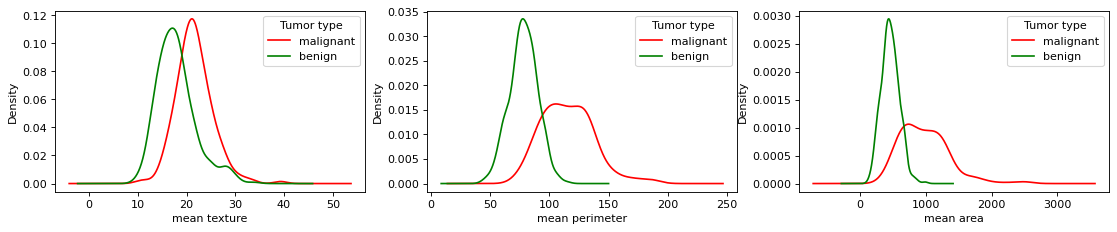

In [27]:
feature_list = ['mean texture', 'mean perimeter', 'mean area']

fig, axs = plt.subplots(1,len(feature_list), figsize=(17,3), dpi= 80)

for i_feature, feature in enumerate(feature_list):
    
    for i_tumor_type, tumor_type in enumerate(['malignant', 'benign']):
        features[feature][target['tumor type']==tumor_type].plot(kind='density', label=tumor_type, c=['red', 'green'][i_tumor_type], ax=axs[i_feature])
    
    axs[i_feature].set_xlabel(feature_list[i_feature])
    axs[i_feature].legend(title='Tumor type')
    
plt.show()   

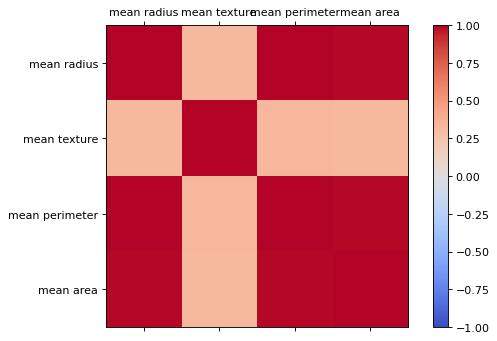

In [28]:
correlation = features[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].corr()
fig = plt.figure(figsize=(8,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = features[['mean radius', 'mean texture', 'mean perimeter', 'mean area']].columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [29]:
correlation['mean radius'][feature_list]

mean texture      0.323782
mean perimeter    0.997855
mean area         0.987357
Name: mean radius, dtype: float64

All three features are correlated with the target, so they could all be of interest. 
When we check the correlation with the predictor that is already in the model, we can tell that mean perimeter and mean area are highly correlated with mean radius, so probably they would not bring additional information the model. Mean texture seems not very correlated with mean radius, so probably it is the best predictor to add in order to improve the accuracy of the model.

  * Re-train the logistic regression.

In [30]:
X = features[['mean radius', 'mean texture']]

# Test-train split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling
sc_2 = StandardScaler()
X_train_2 = sc_2.fit_transform(X_train_2)
X_test_2 = sc_2.transform(X_test_2)

# Training 
classifier_2 = LogisticRegression()
classifier_2.fit(X_train_2, y_train_2)

LogisticRegression()

In [31]:
# Proba and prediction
y_proba_2 = classifier_2.predict_proba(X_test_2)
y_pred_2 = classifier_2.predict(X_test_2)

# Confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

# Performances
accuracy_2 = (cm_2[0, 0] + cm_2[1, 1]) / cm_2.sum()
precision_2 = cm_2[1, 1] / (cm_2[0, 1]  + cm_2[1, 1])
recall_2 = cm_2[1, 1] / (cm_2[1, 0]  + cm_2[1, 1])
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_2,2)))
print('Precision (proportion of true malignant among tumor type prediction) is ' + str(round(precision_2,2)))
print('Recall (proportion of true malignant that are correctly predicted) is ' + str(round(recall_2,2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true malignant among tumor type prediction) is 0.87
Recall (proportion of true malignant that are correctly predicted) is 0.87


The recall has slightly increased from 0.85 to 0.87.

  * ROC curves of the two previous models and the comparison.

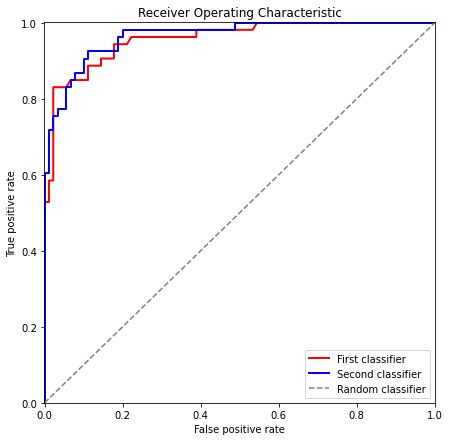

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = y_proba[:,1]
y_score_2 = y_proba_2[:,1]

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')
# Plot ROC curve for first classifier
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
plt.plot(false_positive_rate, true_positive_rate, c='red', linewidth=2, label='First classifier')
# Plot ROC curve for second classifier
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score_2)
plt.plot(false_positive_rate, true_positive_rate, c='blue', linewidth=2, label='Second classifier')
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

The two classifiers are very similar. Though, the second classifier is slightly better for most threshold values.